In [2]:
import pandas as pd
import geopandas as gpd
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import signal
import datetime

In [3]:
import os,glob
g = os.getcwd()
g
path = 'D:\\repos\\CIAT\\IDB_PROJECT'
os.chdir(path)

In [7]:
data_month = pd.read_csv("Data_IDB/data_monthly.csv")

In [8]:
Points = gpd.read_file("Data_IDB/new/Zona_influencia_DR.shp")
# print(Points.crs)
Points = Points.to_crs("EPSG:4326")
ID = str(Points["cuest_id_b"]) + str(Points["parcela"])
str1 = [str(int) for int in Points["cuest_id_b"]] 
str2 = [str(int) for int in Points["parcela"]]
Points["ID"] = [int(s1 + s2) for s1, s2 in zip(str1, str2)]
ok = Points[Points['corregido2'].str.contains("ok")]
base = ok[["ID","patca"]]
base

,ID,patca
0,386311,1
1,386512,1
2,396011,0
3,407811,1
4,411411,0
...,...,...
372,321413,0
373,321412,0
374,332612,1
375,337521,0


- merge baseline and iv data 

In [162]:
merge = base.merge(data_month, how = "inner", on=["ID"])
merge.index = pd.to_datetime(merge['date'])
merge['date'] = pd.to_datetime(merge['date'])
merge.head()
merge['sem']= merge.date.dt.year.astype(str) + '-'+ np.where(merge.date.dt.quarter.gt(2),"12-31","06-30").astype(str)
merge['sem'] = pd.to_datetime(merge['sem'])
merge.head()

merge

,ID,patca,date,NDVI,OSAVI,EVI,NWVI,sem
date,,,,,,,,
2011-01-31,386311,1,2011-01-31,0.539780,0.351034,0.315132,0.028462,2011-06-30
2011-02-28,386311,1,2011-02-28,0.474699,0.288075,0.252084,0.058951,2011-06-30
2011-03-31,386311,1,2011-03-31,0.351673,0.212739,0.185442,0.159993,2011-06-30
2011-04-30,386311,1,2011-04-30,0.360117,0.241030,0.224611,0.159028,2011-06-30
2011-05-31,386311,1,2011-05-31,0.424789,0.313127,0.312472,0.109296,2011-06-30
...,...,...,...,...,...,...,...,...
2019-07-31,351421,0,2019-07-31,0.692085,0.498708,0.492772,-0.139675,2019-12-31
2019-08-31,351421,0,2019-08-31,0.671625,0.486502,0.495995,-0.147049,2019-12-31
2019-10-31,351421,0,2019-10-31,0.719612,0.516905,0.542225,-0.178841,2019-12-31


In [163]:
mean= merge.groupby(["sem","patca"])
mean = mean.apply(np.mean)
mean.drop(["ID","patca"], axis=1, inplace = True)
mean = mean.reset_index()
mean.head()

C:\Users\fmontenegro\Miniconda3\envs\GEE\lib\site-packages\numpy\core\fromnumeric.py:3332: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,sem,patca,NDVI,OSAVI,EVI,NWVI
0,2011-06-30,0,0.508475,0.348100,0.337016,-0.009575
1,2011-06-30,1,0.544342,0.369455,0.352553,-0.048102
2,2011-12-31,0,0.626695,0.437161,0.437733,-0.148560
3,2011-12-31,1,0.627862,0.435120,0.430640,-0.156772
4,2012-06-30,0,0.515429,0.356260,0.351638,-0.046520


In [164]:
group= mean.groupby(["patca"])
diff_all = pd.DataFrame()
for i in range(0,2):
    print(i)
    df = group.get_group(i)
    diff = df.diff(axis=0)
    diff["sem"] = df["sem"]
    diff["patca"] = df["patca"]
    diff_all = diff_all.append(diff)
diff_all.dropna(inplace = True)
diff_all

0
1


,sem,patca,NDVI,OSAVI,EVI,NWVI
2,2011-12-31,0,0.118220,0.089061,0.100717,-0.138986
4,2012-06-30,0,-0.111266,-0.080901,-0.086095,0.102040
6,2012-12-31,0,0.063726,0.045224,0.039866,-0.043104
8,2013-06-30,0,-0.066519,-0.043976,-0.042127,0.061014
10,2013-12-31,0,0.089423,0.065897,0.067644,-0.095434
12,2014-06-30,0,-0.061586,-0.044627,-0.056188,0.089747
14,2014-12-31,0,0.068274,0.049177,0.052481,-0.075483
16,2015-06-30,0,-0.082558,-0.058237,-0.062104,0.078905
18,2015-12-31,0,0.018067,0.012613,0.014417,-0.021055
20,2016-06-30,0,0.017205,0.010798,0.014531,-0.004067


In [165]:
# trimestre_trends = pd.DataFrame() 
# group_id= data_month.groupby(["patca"])
# for fid in data_month.patca.unique():
# #     print(fid)
#     ID = group_id.get_group(fid)
#     ID
#     monthly_mean = ID.resample('Q').mean()

In [168]:
# sns.set_style("white")
rc={"font.weight":"bold",'figure.figsize':(30, 6),'axes.labelsize': 28, 
    'font.size': 28,'axes.titlesize': 28,'legend.fontsize': 18, 'axes.titlesize': 28,
   "lines.linewidth": 2.5,'font.sans-serif': "Times New Roman"}
# sns.set()
sns.set(style="white", rc=rc,font_scale = 1.8)

DATE = pd.DataFrame({
    'inside':['2012-01-01','2013-01-01','2014-01-01','2015-01-01','2016-01-01','2017-01-01','2018-01-01','2019-01-01','2020-01-01']
})

DATE['inside'] = pd.to_datetime(DATE['inside'], format='%Y-%m-%d')
# DATE
# sns.set_style("white")
# sns.set_context("paper",rc=rc,font_scale = 1.5)

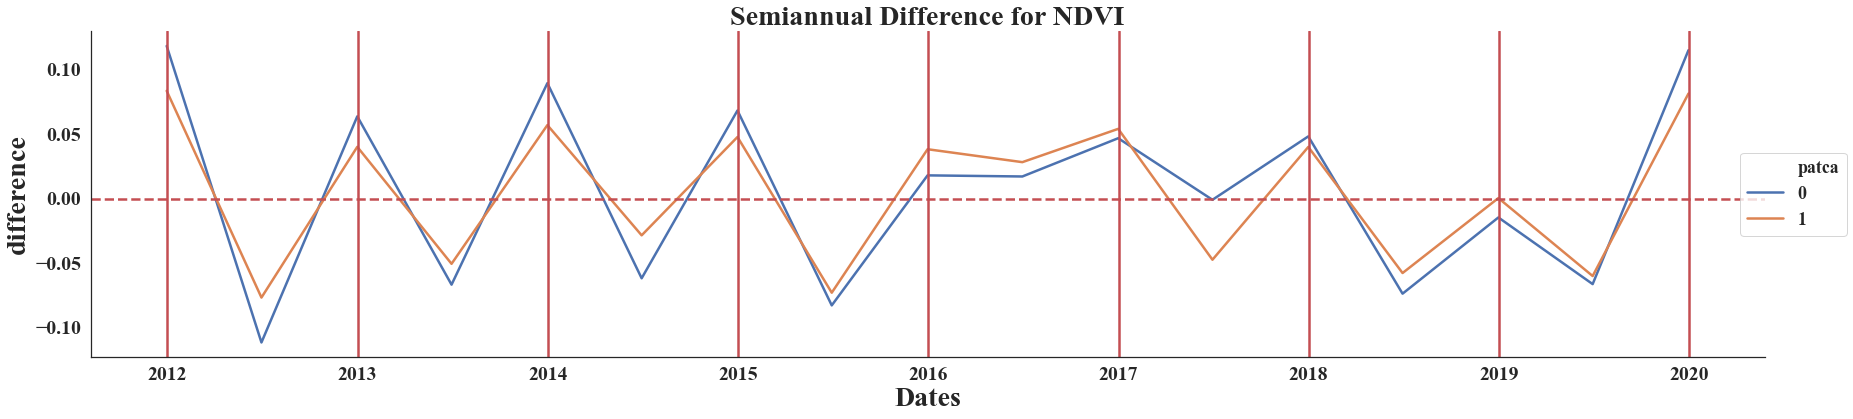

In [170]:
p = sns.lineplot('sem', 'NDVI', hue='patca',data=diff_all)

p.set(xlabel='Dates', ylabel='difference',title="Semiannual Difference for NDVI") #+  str(df1.date.iloc[0][0:4])
# p.set_xticklabels(p.get_xticklabels(),rotation=30, horizontalalignment='right')

handles, labels = p.get_legend_handles_labels()
lgd = dict(zip(labels, handles))
p.legend(lgd.values(), lgd.keys(),loc='center left', bbox_to_anchor=(0.98, 0.5), ncol=1) #'center left'
sns.despine()
for inside  in DATE.inside:
    p.axvline(inside,color='r',label="start year")
p.axhline(0,color='r', ls='--')
figure = p.get_figure()
figure.savefig('Data_IDB/trends/TS_diff-NDVI.png', dpi=600)
# plt.clf()

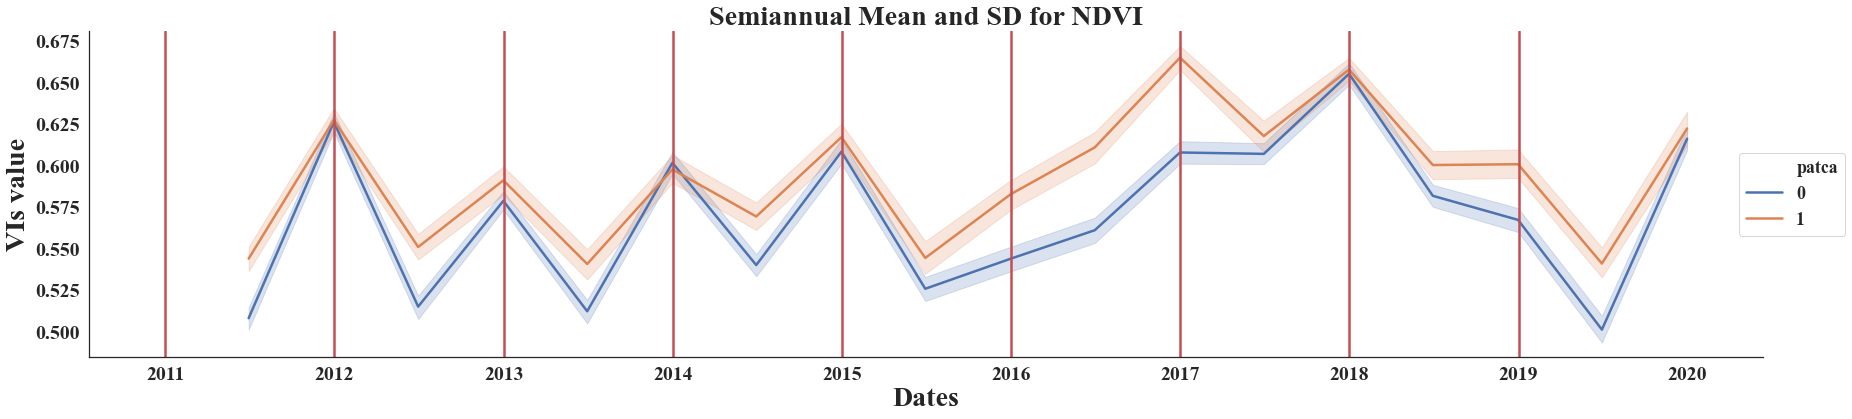

In [142]:
p = sns.lineplot('sem', 'NDVI', hue='patca',data=merge)

p.set(xlabel='Dates', ylabel='VIs value',title="Semiannual Mean and SD for NDVI") #+  str(df1.date.iloc[0][0:4])
# p.set_xticklabels(p.get_xticklabels(),rotation=30, horizontalalignment='right')


handles, labels = p.get_legend_handles_labels()
lgd = dict(zip(labels, handles))
p.legend(lgd.values(), lgd.keys(),loc='center left', bbox_to_anchor=(0.98, 0.5), ncol=1) #'center left'
sns.despine()
for inside  in DATE.inside:
    p.axvline(inside,color='r',label="start year")
# p.xticks(rotation=45)
# p.tick_params(axis='x', labelrotation=90)
#     sns.despine()
figure = p.get_figure()
figure.savefig('Data_IDB/trends/TS_MEAN-NDVI.png', dpi=600)
# plt.clf()